In [1]:
import pickle
from strategy import *
from n_and_c_game_dependents import *
from game import *
from n_and_c_params import *

In [2]:
sx = LearningStrategy(sp_learning_x)
so = LearningStrategy(sp_learning_o)
strategies = [sx, so]

In [3]:
N = 10000
num_iterations = 10

for epoch in range(N):
    game = Game(2, strategies)
    game.play()
    if epoch % 1000 == 0:
        print('Progress: {}%'.format(round(epoch/N*100), 3))

Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%


In [4]:
so.p.learning = False
for i in range(num_iterations):
    print("Iteration: {}".format(i))
    for epoch in range(N):
        game = Game(2, strategies)
        game.play()
            
    sx.p.learning = not sx.p.learning
    so.p.learning = not so.p.learning

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


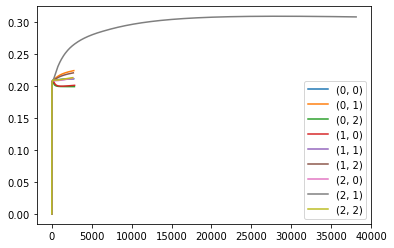

In [5]:
s = sx.states[PureState([['-', '-', '-'], ['-', '-', '-'], ['-', '-', '-']])]
s.plot()

   |   |   
───────────
   |   |   
───────────
   |   |   


Please input move in the form {row}{column}: 00
 x |   |   
───────────
   |   |   
───────────
   |   |   


Exploiting the state:
[['x', '-', '-'], ['-', '-', '-'], ['-', '-', '-']]
Action to take: (2, 2)


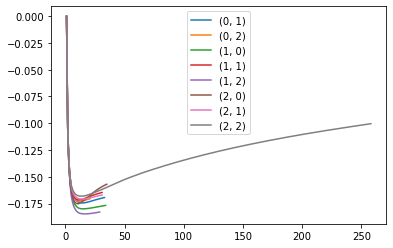

 x |   |   
───────────
   |   |   
───────────
   |   | o 


Please input move in the form {row}{column}: 02
 x |   | x 
───────────
   |   |   
───────────
   |   | o 


Exploiting the state:
[['x', '-', 'x'], ['-', '-', '-'], ['-', '-', 'o']]
Action to take: (0, 1)


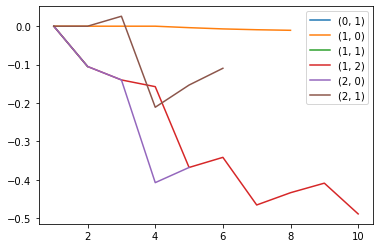

 x | o | x 
───────────
   |   |   
───────────
   |   | o 


Please input move in the form {row}{column}: 20
 x | o | x 
───────────
   |   |   
───────────
 x |   | o 


Exploiting the state:
[['x', 'o', 'x'], ['-', '-', '-'], ['x', '-', 'o']]
Action to take: (2, 1)


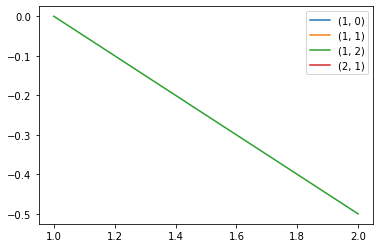

 x | o | x 
───────────
   |   |   
───────────
 x | o | o 




In [ ]:
u = UserInput()
so.p.learning=False
sx.p.learning=False
game = Game(2, [u, so])
game.play(narrate=True, explain=True)

In [8]:
s = so.states[PureState([['x', '-', 'o'], ['-', '-', '-'], ['-', '-', 'x']])]

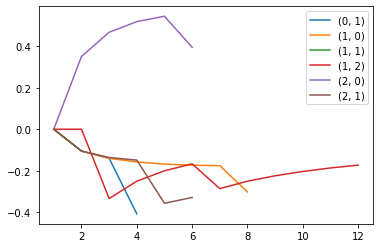

In [9]:
s.plot()

In [10]:
s.max_q_values_of_next_states

{(0, 1): -0.3,
 (1, 0): -0.26984126984126977,
 (1, 1): -0.2606060606060606,
 (1, 2): -0.03605367132867133,
 (2, 0): 0.9243923611111112,
 (2, 1): -0.2686132166115085}

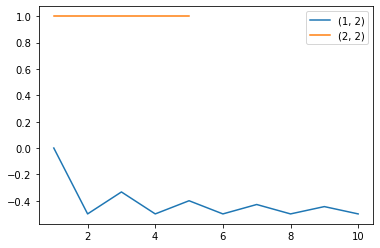

In [17]:
s = so.states[PureState([['o', 'x', 'o'], ['x', 'o', '-'], ['x', 'x', '-']])]
s.plot()

In [24]:
for ps, s in sorted(sx.states.items(), key=lambda a: a[1].total_hits, reverse=True):
    ps.display()
    print("{:<15}{:<15}{:<15}".format("action", "q-value", "hits"))
    for a in s.allowed_actions:
        print("{:<15}{:<15}{:<15}".format(str(a), round(s.actions[a], 3), s.num_hits[a]))
    print("\n")

   |   |   
───────────
   |   |   
───────────
   |   |   


action         q-value        hits           
(0, 0)         0.006          448            
(0, 1)         0.0            491            
(0, 2)         0.002          464            
(1, 0)         0.114          6312           
(1, 1)         0.005          471            
(1, 2)         0.003          425            
(2, 0)         0.004          486            
(2, 1)         0.004          441            
(2, 2)         0.005          462            


   |   |   
───────────
 x |   |   
───────────
 o |   |   


action         q-value        hits           
(0, 0)         0.005          56             
(0, 1)         0.001          51             
(0, 2)         0.006          63             
(1, 1)         0.032          54             
(1, 2)         0.333          498            
(2, 1)         0.01           58             
(2, 2)         0.007          48             


   |   |   
───────────
 x | o |   
────────

(0, 1)         -0.4           5              
(0, 2)         1.0            9              
(2, 1)         0.545          11             


   | o |   
───────────
 x |   | x 
───────────
   |   | o 


action         q-value        hits           
(0, 0)         0.184          6              
(0, 2)         0.56           5              
(1, 1)         1.0            6              
(2, 0)         0.56           5              
(2, 1)         0.029          3              


 o |   | o 
───────────
 x |   |   
───────────
   | x |   


action         q-value        hits           
(0, 1)         0.223          8              
(1, 1)         -0.075         4              
(1, 2)         0.02           4              
(2, 0)         -0.5           2              
(2, 2)         0.417          6              


   | x | o 
───────────
 x |   |   
───────────
 o |   |   


action         q-value        hits           
(0, 0)         0.004          5              
(1, 1)         0.017      


action         q-value        hits           
(0, 0)         1.0            3              
(1, 1)         0.289          9              
(1, 2)         0.0            1              


   | o |   
───────────
 x | x |   
───────────
 o |   |   


action         q-value        hits           
(0, 0)         0.467          3              
(0, 2)         0.35           2              
(1, 2)         1.0            2              
(2, 1)         0.007          4              
(2, 2)         0.0            2              


   |   | x 
───────────
 x |   | o 
───────────
 x | o | o 


action         q-value        hits           
(0, 0)         1.0            5              
(0, 1)         0.56           5              
(1, 1)         1.0            3              


   |   | o 
───────────
 x | o | x 
───────────
 x | o |   


action         q-value        hits           
(0, 0)         1.0            4              
(0, 1)         0.0            3              
(2, 2)         -0.333    



action         q-value        hits           
(2, 2)         1.0            8              


 x | o |   
───────────
   |   |   
───────────
   | o | x 


action         q-value        hits           
(0, 2)         0.0            1              
(1, 0)         0              0              
(1, 1)         1.0            1              
(1, 2)         -0.25          4              
(2, 0)         -0.5           2              


   |   |   
───────────
   | o |   
───────────
 x | o | x 


action         q-value        hits           
(0, 0)         0.0            1              
(0, 1)         0              0              
(0, 2)         0.0            2              
(1, 0)         0.0            1              
(1, 2)         0.08           4              


 o |   |   
───────────
   | x | o 
───────────
 o | x | x 


action         q-value        hits           
(0, 1)         0              0              
(0, 2)         -0.4           5              
(1, 0)         0.467    

action         q-value        hits           
(0, 0)         0              0              
(0, 2)         0.0            1              
(1, 0)         0.467          3              
(1, 1)         0.0            2              
(1, 2)         0              0              


 o |   | x 
───────────
 x |   | o 
───────────
   | o | x 


action         q-value        hits           
(0, 1)         0.0            1              
(1, 1)         0.467          3              
(2, 0)         0.35           2              


 o |   | x 
───────────
 x | x | o 
───────────
 o |   |   


action         q-value        hits           
(0, 1)         0.35           2              
(2, 1)         0.0            1              
(2, 2)         0.0            3              


   | x | o 
───────────
 o |   |   
───────────
 x |   |   


action         q-value        hits           
(0, 0)         0.0            2              
(1, 1)         0.0            1              
(1, 2)         0          

(2, 2)         0.0            2              


   | o |   
───────────
 o |   | x 
───────────
 x | o | x 


action         q-value        hits           
(0, 0)         -0.5           2              
(0, 2)         0              0              
(1, 1)         0.35           2              


 x | x |   
───────────
 o | x |   
───────────
 o |   | o 


action         q-value        hits           
(0, 2)         1.0            2              
(1, 2)         0.0            1              
(2, 1)         1.0            1              


 o |   | x 
───────────
   |   | x 
───────────
 o |   |   


action         q-value        hits           
(0, 1)         0              0              
(1, 0)         0.0            2              
(1, 1)         0              0              
(2, 1)         0.0            1              
(2, 2)         1.0            1              


   | x |   
───────────
   | o | x 
───────────
   | o |   


action         q-value        hits           
(0, 0)  

(1, 2)         0              0              
(2, 0)         0              0              


 o | x | x 
───────────
 o |   | x 
───────────
 x | o | o 


action         q-value        hits           
(1, 1)         1.0            3              


 x | x | o 
───────────
   | o | o 
───────────
 x |   |   


action         q-value        hits           
(1, 0)         1.0            1              
(2, 1)         0              0              
(2, 2)         -0.5           2              


 x | o | x 
───────────
   |   | o 
───────────
   | x | o 


action         q-value        hits           
(1, 0)         0.35           2              
(1, 1)         0              0              
(2, 0)         0.0            1              


 o | x | o 
───────────
   |   |   
───────────
 x | o | x 


action         q-value        hits           
(1, 0)         0.0            2              
(1, 1)         0              0              
(1, 2)         0.0            1              


   | x

(1, 1)         -0.5           2              
(2, 1)         0              0              


   | x | o 
───────────
 x | o |   
───────────
   | o | x 


action         q-value        hits           
(0, 0)         0.0            1              
(1, 2)         0.0            1              
(2, 0)         0              0              


 x |   | o 
───────────
 o | x | o 
───────────
 x |   |   


action         q-value        hits           
(0, 1)         0.0            1              
(2, 1)         0.0            1              
(2, 2)         0              0              


 x |   |   
───────────
 o | x | x 
───────────
   | o | o 


action         q-value        hits           
(0, 1)         0              0              
(0, 2)         0.35           2              
(2, 0)         0              0              


 x |   |   
───────────
 o | o |   
───────────
 x | x | o 


action         q-value        hits           
(0, 1)         0              0              
(0, 2)  